1. Í≥ÑÌÜµÏ∂îÏ∂ú(test set Ï∂îÏ∂ú)  
2. 3Î≤à Ïù¥Ìïò, 4Î≤àÏù¥Ìïò ÎπàÎèÑÏàò Îã®Ïñ¥Îì§Î°ú Íµ¨Î∂ÑÏßÄÏñ¥ Ïã§ÌñâÌï¥Î≥¥Í∏∞ ‚Üí Îã®Ïñ¥ Î™á Í∞ú Ï†ïÎèÑ ÎÇ®Í∏∏Í±¥ÏßÄ Í≤∞Ï†ï
ex. 5000Í∞ú Í∞ÄÏßÄÍ≥† train ÌñàÏùÑ Í≤ΩÏö∞Ïùò Ï†ïÌôïÎèÑ

In [6]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import re
import urllib.request
from konlpy.tag import Okt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from collections import Counter
from sklearn.model_selection import train_test_split

In [7]:
data = pd.read_csv('DS01.csv')
data

Î∞úÌôî  Í∞êÏ†ï_int
0                               Ïñ∏Îãà ÎèôÏÉùÏúºÎ°ú Î∂ÄÎ•¥ÎäîÍ≤å ÎßûÎäî ÏùºÏù∏Í∞ÄÏöî..??       0
1                                           Í∑∏ÎÉ• ÎÇ¥ ÎäêÎÇåÏùºÎøêÍ≤†ÏßÄ?       0
2                                         ÏïÑÏßÅÎÑàÎ¨¥Ï¥àÍ∏∞ÎùºÏÑú Í∑∏Îü∞Í±∞Ï£†?       0
3                                          Ïú†ÏπòÏõêÎ≤ÑÏä§ ÏÇ¨Í≥† ÎÇ´Îã§ÎçòÎç∞       0
4                                            Í∑ºÎç∞ ÏõêÎûòÏù¥Îü∞Í±∞ÎßûÎÇòÏöî       0
...                                                  ...     ...
14129                                  Î¥êÎ¥ê, Ïù¥Í±∞ ÎÑàÎ¨¥ Î≥µÏã§Î≥µÏã§ÌïòÏßÄ?       1
14130  ÌïòÍ∏¥ ÎÇ®ÏûêÏï†ÎãàÍπå. Î≥ÑÎ°ú Í¥ÄÏã¨ ÏóÜÏúºÎ†§ÎÇò? Í∑∏ÎûòÎèÑ Ïó¨Í∏∞ ÎÇ®ÏÑ± ÏùòÎ•ò ÎßêÏïº, ÌèâÌåêÏù¥ ÍΩ§ Ï¢ã...       1
14131                  Ïù¥Îü¥ Îïê ÏßÑÏßú ÏßàÏÉâÌïòÎäî ÌëúÏ†ïÏù¥ ÎêúÎã§ÎãàÍπê. Í∞êÌÉÑÏä§ÎüΩÍ∏∞ÍπåÏßÄ Ìï¥.       1
14132  ÎÑàÎ¨¥ ÎåÄÎÜìÍ≥† Í∑∏Îü¨Î©¥ Ïó≠Ìö®Í≥ºÏûñÎãà? ÎÇú ÏßÄÍ∏à Ïù¥ÎåÄÎ°úÎ©¥ Ï∂©Î∂ÑÌïúÍ±∏. ‚Ä¶‚Ä¶ÌïòÍ∏¥, ÏòõÎÇ†Ïóî ÌéòÏñ¥...       1
14133       Í≥†ÎßôÍ∏¥Ïöî. Ï†úÍ∞Ä Ìï† Ïàò ÏûàÎäî Í±¥ Ïù¥ Ï†ïÎèÑÍ∞Ä Ï†ÑÎ∂ÄÏù∏Í±∏Ïöî. ÏÑ†Î∞∞Îãò, Î∂ÄÎîî ÌûòÎÇ¥ÏÑ∏Ïöî.       1

[14134 rows x 2 columns]

In [8]:
 data['Î∞úÌôî'].nunique(), data['Í∞êÏ†ï_int'].nunique()

(14075, 2)

In [9]:
data.isnull().sum()

Î∞úÌôî        0
Í∞êÏ†ï_int    0
dtype: int64

In [10]:
data.drop_duplicates(subset = ["Î∞úÌôî"], inplace = True)
data

Î∞úÌôî  Í∞êÏ†ï_int
0                               Ïñ∏Îãà ÎèôÏÉùÏúºÎ°ú Î∂ÄÎ•¥ÎäîÍ≤å ÎßûÎäî ÏùºÏù∏Í∞ÄÏöî..??       0
1                                           Í∑∏ÎÉ• ÎÇ¥ ÎäêÎÇåÏùºÎøêÍ≤†ÏßÄ?       0
2                                         ÏïÑÏßÅÎÑàÎ¨¥Ï¥àÍ∏∞ÎùºÏÑú Í∑∏Îü∞Í±∞Ï£†?       0
3                                          Ïú†ÏπòÏõêÎ≤ÑÏä§ ÏÇ¨Í≥† ÎÇ´Îã§ÎçòÎç∞       0
4                                            Í∑ºÎç∞ ÏõêÎûòÏù¥Îü∞Í±∞ÎßûÎÇòÏöî       0
...                                                  ...     ...
14129                                  Î¥êÎ¥ê, Ïù¥Í±∞ ÎÑàÎ¨¥ Î≥µÏã§Î≥µÏã§ÌïòÏßÄ?       1
14130  ÌïòÍ∏¥ ÎÇ®ÏûêÏï†ÎãàÍπå. Î≥ÑÎ°ú Í¥ÄÏã¨ ÏóÜÏúºÎ†§ÎÇò? Í∑∏ÎûòÎèÑ Ïó¨Í∏∞ ÎÇ®ÏÑ± ÏùòÎ•ò ÎßêÏïº, ÌèâÌåêÏù¥ ÍΩ§ Ï¢ã...       1
14131                  Ïù¥Îü¥ Îïê ÏßÑÏßú ÏßàÏÉâÌïòÎäî ÌëúÏ†ïÏù¥ ÎêúÎã§ÎãàÍπê. Í∞êÌÉÑÏä§ÎüΩÍ∏∞ÍπåÏßÄ Ìï¥.       1
14132  ÎÑàÎ¨¥ ÎåÄÎÜìÍ≥† Í∑∏Îü¨Î©¥ Ïó≠Ìö®Í≥ºÏûñÎãà? ÎÇú ÏßÄÍ∏à Ïù¥ÎåÄÎ°úÎ©¥ Ï∂©Î∂ÑÌïúÍ±∏. ‚Ä¶‚Ä¶ÌïòÍ∏¥, ÏòõÎÇ†Ïóî ÌéòÏñ¥...       1
14133       Í≥†ÎßôÍ∏¥Ïöî. Ï†úÍ∞Ä Ìï† Ïàò ÏûàÎäî Í±¥ Ïù¥ Ï†ïÎèÑÍ∞Ä Ï†ÑÎ∂ÄÏù∏Í±∏Ïöî. ÏÑ†Î∞∞Îãò, Î∂ÄÎîî ÌûòÎÇ¥ÏÑ∏Ïöî.       1

[14075 rows x 2 columns]

In [11]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/bab2min/corpus/master/sentiment/naver_shopping.txt", filename="ratings_total.txt")

('ratings_total.txt', <http.client.HTTPMessage at 0x18cb0c5d910>)

In [12]:
total_data = pd.read_table('ratings_total.txt', names=['ratings', 'Î∞úÌôî'])
print('Ï†ÑÏ≤¥ Î¶¨Î∑∞ Í∞úÏàò :',len(total_data)) # Ï†ÑÏ≤¥ Î¶¨Î∑∞ Í∞úÏàò Ï∂úÎ†•

Ï†ÑÏ≤¥ Î¶¨Î∑∞ Í∞úÏàò : 200000


In [13]:
total_data['Í∞êÏ†ï_int'] = np.select([total_data.ratings > 3], [1], default=0)
total_data[4000:4005]

ratings                                                 Î∞úÌôî  Í∞êÏ†ï_int
4000        5                                       Ïä§ÌÉÄÏùºÏù¥Ï¢ãÏùÄÍ≤ÉÍ∞ôÏïÑÏöîüòÅüëç       1
4001        2                       Ïã∏Íµ¨Î†§Í∞ôÏïÑÏöî...... ÌïúÎ≤àÏùÑ Î™ªÏ∞®Í≥† ÎÅàÏñ¥Ï†∏Î≤ÑÎ¶º..       0
4002        2  Ìï¥Ïô∏Ïóê ÏûàÏñ¥ÏÑú ÌïúÍµ≠ ÎÇòÍ∞ÑÍπÄÏóê Ï£ºÎ¨∏Ìï¥ÏÑú Í∞ÄÏßÄÍ≥† ÏôîÎäîÎç∞ ÏõêÌñàÎçò ÎßõÏù¥ ÏïÑÎãàÏóêÏöî. ÏûëÎÖÑÏóê ...       0
4003        5                                     Ìñ•ÎèÑ Ï¢ãÍ≥† Î™®ÏñëÎèÑ ÏòàÎªêÏöî.       1
4004        1                                Îã§ÏãúÎäî ÎÑ§Ïù¥Î≤ÑÏóêÏÑú Í≥ºÏùºÏùÄ ÏÇ¨ÏßÄÏïäÏùÑÎìØ       0

In [14]:
total_data['ratings'].nunique(), total_data['Î∞úÌôî'].nunique(), total_data['Í∞êÏ†ï_int'].nunique()

(4, 199908, 2)

In [15]:
total_data.drop_duplicates(subset=['Î∞úÌôî'], inplace=True) # reviews Ïó¥ÏóêÏÑú Ï§ëÎ≥µÏù∏ ÎÇ¥Ïö©Ïù¥ ÏûàÎã§Î©¥ Ï§ëÎ≥µ Ï†úÍ±∞
print('Ï¥ù ÏÉòÌîåÏùò Ïàò :',len(total_data))

Ï¥ù ÏÉòÌîåÏùò Ïàò : 199908


In [16]:
print(total_data.isnull().values.any())

False


In [17]:
total_data = total_data.drop(['ratings'], axis = 1)

In [18]:
total_data

Î∞úÌôî  Í∞êÏ†ï_int
0                                                 Î∞∞Í≥µÎπ†Î•¥Í≥† Íµø       1
1                           ÌÉùÎ∞∞Í∞Ä ÏóâÎßùÏù¥ÎÑ§Ïö© Ï†ÄÌù¨Ïßë Î∞ëÏóêÏ∏µÏóê ÎßêÎèÑÏóÜÏù¥ ÎÜîÎëêÍ≥†Í∞ÄÍ≥†       0
2       ÏïÑÏ£ºÏ¢ãÏïÑÏöî Î∞îÏßÄ Ï†ïÎßê Ï¢ãÏïÑÏÑú2Í∞ú Îçî Íµ¨Îß§ÌñàÏñ¥Ïöî Ïù¥Í∞ÄÍ≤©Ïóê ÎåÄÎ∞ïÏûÖÎãàÎã§. Î∞îÎäêÏßàÏù¥ Ï°∞Í∏à ...       1
3       ÏÑ†Î¨ºÏö©ÏúºÎ°ú Îπ®Î¶¨ Î∞õÏïÑÏÑú Ï†ÑÎã¨ÌñàÏñ¥Ïïº ÌïòÎäî ÏÉÅÌíàÏù¥ÏóàÎäîÎç∞ Î®∏Í∑∏ÏªµÎßå ÏôÄÏÑú ÎãπÌô©ÌñàÏäµÎãàÎã§. Ï†Ñ...       0
4                       ÎØºÌä∏ÏÉâÏÉÅ ÏòàÎªêÏöî. ÏòÜ ÏÜêÏû°Ïù¥Îäî Í±∞Îäî Ïö©ÎèÑÎ°úÎèÑ ÏÇ¨Ïö©ÎêòÎÑ§Ïöî „Öé„Öé       1
...                                                   ...     ...
199995                                    Ïû•ÎßàÎùºÍ∑∏Îü∞Í∞Ä!!! Îã¨ÏßÄÏïäÏïÑÏöî       0
199996  Îã§Ïù¥Ïä® ÏºÄÏù¥Ïä§ Íµ¨Îß§ÌñàÏñ¥Ïöî Îã§Ïù¥Ïä® ÏäàÌçºÏÜåÎãâ ÎìúÎùºÏù¥Í∏∞ ÏºÄÏù¥Ïä§ Íµ¨Îß§ÌñàÏñ¥ÏöîÍ∞ÄÍ≤© Í¥úÏ∞ÆÍ≥† Î∞∞ÏÜ°...       1
199997                    Î°úÎìúÏÉæÏóêÏÑú ÏÇ¨ÎäîÍ≤ÉÎ≥¥Îã§ ÏÑ∏Î∞∞ Ï†ÄÎ†¥ÌïòÎÑ§Ïöî „Öú„Öú ÏûêÏ£ºÏù¥Ïö©Ìï†ÍªòÏöî       1
199998                                      ÎÑòÏù¥ÏÅòÍ≥† ÏéÑÎ†®ÎêòÎ≥¥Ïù¥ÎÑ§Ïöî~       1
199999   ÏïÑÏßÅ ÏÇ¨Ïö©Ìï¥Î≥¥ÏßÄÎèÑÏïäÏïòÍ≥† Îã§Î•∏ Ï†úÌíàÏùÑ Ïç®Î≥∏Ï†ÅÏù¥ÏóÜÏñ¥ÏÑú Ïûò Î™®Î•¥Í≤†ÏßÄÎßå „Öé„Öé Î∞∞ÏÜ°ÏùÄ Îπ®ÎûêÏäµÎãàÎã§       1

[199908 rows x 2 columns]

In [19]:
Data = pd.concat([data, total_data])

In [20]:
Data

Î∞úÌôî  Í∞êÏ†ï_int
0                                Ïñ∏Îãà ÎèôÏÉùÏúºÎ°ú Î∂ÄÎ•¥ÎäîÍ≤å ÎßûÎäî ÏùºÏù∏Í∞ÄÏöî..??       0
1                                            Í∑∏ÎÉ• ÎÇ¥ ÎäêÎÇåÏùºÎøêÍ≤†ÏßÄ?       0
2                                          ÏïÑÏßÅÎÑàÎ¨¥Ï¥àÍ∏∞ÎùºÏÑú Í∑∏Îü∞Í±∞Ï£†?       0
3                                           Ïú†ÏπòÏõêÎ≤ÑÏä§ ÏÇ¨Í≥† ÎÇ´Îã§ÎçòÎç∞       0
4                                             Í∑ºÎç∞ ÏõêÎûòÏù¥Îü∞Í±∞ÎßûÎÇòÏöî       0
...                                                   ...     ...
199995                                    Ïû•ÎßàÎùºÍ∑∏Îü∞Í∞Ä!!! Îã¨ÏßÄÏïäÏïÑÏöî       0
199996  Îã§Ïù¥Ïä® ÏºÄÏù¥Ïä§ Íµ¨Îß§ÌñàÏñ¥Ïöî Îã§Ïù¥Ïä® ÏäàÌçºÏÜåÎãâ ÎìúÎùºÏù¥Í∏∞ ÏºÄÏù¥Ïä§ Íµ¨Îß§ÌñàÏñ¥ÏöîÍ∞ÄÍ≤© Í¥úÏ∞ÆÍ≥† Î∞∞ÏÜ°...       1
199997                    Î°úÎìúÏÉæÏóêÏÑú ÏÇ¨ÎäîÍ≤ÉÎ≥¥Îã§ ÏÑ∏Î∞∞ Ï†ÄÎ†¥ÌïòÎÑ§Ïöî „Öú„Öú ÏûêÏ£ºÏù¥Ïö©Ìï†ÍªòÏöî       1
199998                                      ÎÑòÏù¥ÏÅòÍ≥† ÏéÑÎ†®ÎêòÎ≥¥Ïù¥ÎÑ§Ïöî~       1
199999   ÏïÑÏßÅ ÏÇ¨Ïö©Ìï¥Î≥¥ÏßÄÎèÑÏïäÏïòÍ≥† Îã§Î•∏ Ï†úÌíàÏùÑ Ïç®Î≥∏Ï†ÅÏù¥ÏóÜÏñ¥ÏÑú Ïûò Î™®Î•¥Í≤†ÏßÄÎßå „Öé„Öé Î∞∞ÏÜ°ÏùÄ Îπ®ÎûêÏäµÎãàÎã§       1

[213983 rows x 2 columns]

In [21]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(Data, test_size=0.25, random_state=210615)
print('ÌõàÎ†®Ïö© Î¶¨Î∑∞Ïùò Í∞úÏàò :', len(train))
print('ÌÖåÏä§Ìä∏Ïö© Î¶¨Î∑∞Ïùò Í∞úÏàò :', len(test))

ÌõàÎ†®Ïö© Î¶¨Î∑∞Ïùò Í∞úÏàò : 160487
ÌÖåÏä§Ìä∏Ïö© Î¶¨Î∑∞Ïùò Í∞úÏàò : 53496


   Í∞êÏ†ï_int  count
0       0  80350
1       1  80137


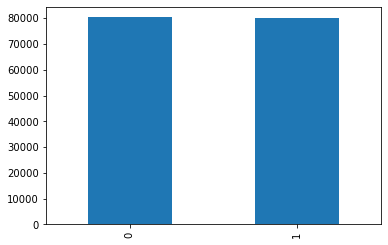

In [22]:
train['Í∞êÏ†ï_int'].value_counts().plot(kind = 'bar')
print(train.groupby('Í∞êÏ†ï_int').size().reset_index(name = 'count'))

In [23]:
train

Î∞úÌôî  Í∞êÏ†ï_int
134198  ÎåìÍ∏ÄÏùò ÎÇ¥Ïö©Î≥¥Îã§Îäî ÏàòÎ∂ÑÏÑ±Î∂ÑÏù¥ Ï¢Ä ÏïΩÌïú Í≤É Í∞ôÏïÑÏÑú Í∞úÏù∏Ï†ÅÏúºÎ°ú Í∏∞ÎåÄÌïú Í≤É Î≥¥Îã§Îäî Î™ª Ìïú...       0
9799                              ÌîÑÎùºÏù¥Ìå¨ Ïïà Î∞îÎã• Î¨¥ÎãàÍ∞Ä Ï°∞Í∏à Ïù¥ÏÉÅÌïòÎÑ§Ïöî~       0
169586  ÏïÑÏù¥ Î∞§ Í∏∞Ï†ÄÍ∑Ä ÎñºÎ≥¥Î†§Í≥† Ï£ºÎ¨∏ÌñàÏñ¥Ïöî. ÏÑ∏ÌÉÅÌïòÍ≥† Ï≤òÏùå ÏûêÎã§Í∞Ä Ïã§Ïàò ÌñàÏùÑÎïê Î∞©ÏàòÍ∞Ä ÏûòÎêò...       0
369               Ìï≠ÏÉÅ Ï£ºÎ¨∏ÌïòÎäî Ï†úÌíàÏúºÎ°ú ÏÇ¨Ïù¥Ï¶à Ï¢ãÍ≥† Î¨¥ÏóáÎ≥¥Îã§ ÏÜêÎãòÎì§Ïù¥ ÎÑàÎ¨¥ ÎßõÏûàÎç∞Ïöî .       1
67599              ÎÑàÎ¨¥ ÏïΩÌï¥Ïöî ÏÑ±Ïù∏Ïù¥ ÏïâÏúºÎ©¥ Ï°∞Ïã¨Ìï¥Ïïº Ìï©ÎãàÎã§ Î∞îÍæ∏Í∏∞ Í∑ÄÏ∞ÆÏïÑÏÑú Í∑∏ÎÉ• Ïç®Ïöî       0
...                                                   ...     ...
109529  Íµ¨ÏÑ±ÎèÑ Ï¢ãÍ≥†, Îπ†Î•∏ Î∞∞ÏÜ°Ïù¥ ÎßàÏùåÏóê Îì§ÏóàÏñ¥Ïöî. ÏÜêÌÜ±Ïù¥ Î∞îÎîîÎäî ÌÅ∞ Ìé∏Ïù¥Í≥†, Ïû¶ÏùÄ ÎÑ§Ïùº ...       1
144497        Ïò§Ïò§ Ï≤òÏùå Î®πÏñ¥Î≥¥ÎäîÎç∞ ÎÇ¥Ïû•Ïù¥ ÏßÑÎìùÌïòÍ≥† Í≥†ÏÜå Îã¥Î∞± ÎßõÎÇòÎÑ§Ïöî Îã§ÏùåÏóê Îòê Ï£ºÎ¨∏Ìï†Í≤åÏöî       1
349                                     Ï†ÄÎ†¥Ìïú Í∞ÄÍ≤©Ïóê Î∞∞ÏÜ°Î∞õÏúºÎãà Ï¢ãÏïÑÏöî       1
55214                                     ÏïÑÏßÅ ÎØ∏ÏÇ¨Ïö© Í¥úÏ∞ÆÏùÄÍ±∞ Í∞ôÏïÑÏöî       1
20302      Îã§Î¶¨ ÏòÜÎùºÏù∏ Î¥âÏ†úÏÑ†Ïù¥ ÏïΩÌï¥Ïöî Ìï®Î∂ÄÎ°ú ÏûÖÍ≥† Î≤óÏúºÎ©¥ Ìà¨ÎìùÌà¨Îëë ÏÜåÎ¶¨ÎÇòÏöî Í≥ß Îö´Î¶¥Í≤É ÍπâÏïÑÏöî       0

[160487 rows x 2 columns]

In [24]:
train['Î∞úÌôî'] = train['Î∞úÌôî'].str.replace("[^„Ñ±-„Öé„Öè-„Ö£Í∞Ä-Ìû£ ]","")
test['Î∞úÌôî'] = test['Î∞úÌôî'].str.replace("[^„Ñ±-„Öé„Öè-„Ö£Í∞Ä-Ìû£ ]","")

<ipython-input-24-2981e347a926>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  train['Î∞úÌôî'] = train['Î∞úÌôî'].str.replace("[^„Ñ±-„Öé„Öè-„Ö£Í∞Ä-Ìû£ ]","")
<ipython-input-24-2981e347a926>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Î∞úÌôî'] = train['Î∞úÌôî'].str.replace("[^„Ñ±-„Öé„Öè-„Ö£Í∞Ä-Ìû£ ]","")
<ipython-input-24-2981e347a926>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  test['Î∞úÌôî'] = test['Î∞úÌôî'].str.replace("[^„Ñ±-„Öé„Öè-„Ö£Í∞Ä-Ìû£ ]","")
<ipython-input-24-2981e347a926>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

In [25]:
train['Î∞úÌôî'] = train['Î∞úÌôî'].str.replace('^ +', "")
test['Î∞úÌôî'] = test['Î∞úÌôî'].str.replace('^ +', "")
train['Î∞úÌôî'].replace('', np.nan, inplace = True)
test['Î∞úÌôî'].replace('', np.nan, inplace = True)
print(train.isnull().sum())
print(test.isnull().sum())

<ipython-input-25-aa04aa4f771e>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  train['Î∞úÌôî'] = train['Î∞úÌôî'].str.replace('^ +', "")


Î∞úÌôî        1
Í∞êÏ†ï_int    0
dtype: int64
Î∞úÌôî        0
Í∞êÏ†ï_int    0
dtype: int64


<ipython-input-25-aa04aa4f771e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Î∞úÌôî'] = train['Î∞úÌôî'].str.replace('^ +', "")
<ipython-input-25-aa04aa4f771e>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  test['Î∞úÌôî'] = test['Î∞úÌôî'].str.replace('^ +', "")
<ipython-input-25-aa04aa4f771e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Î∞úÌôî'] = test['Î∞úÌôî'].str.replace('^ +', "")
C:\Users\user\.conda\envs\gz\lib\site-packages\panda

In [26]:
train.loc[train.Î∞úÌôî.isnull()][:10]
test.loc[test.Î∞úÌôî.isnull()][:10]
train = train.dropna(how='any')
test = test.dropna(how='any')
print(train.isnull().sum())
print(test.isnull().sum())
print('Ï†ÑÏ≤òÎ¶¨ ÌõÑ Ìä∏Î†àÏù∏Ïö© ÏÉòÌîåÏùò Í∞úÏàò :',len(train))
print('Ï†ÑÏ≤òÎ¶¨ ÌõÑ ÌÖåÏä§Ìä∏Ïö© ÏÉòÌîåÏùò Í∞úÏàò :',len(test))

Î∞úÌôî        0
Í∞êÏ†ï_int    0
dtype: int64
Î∞úÌôî        0
Í∞êÏ†ï_int    0
dtype: int64
Ï†ÑÏ≤òÎ¶¨ ÌõÑ Ìä∏Î†àÏù∏Ïö© ÏÉòÌîåÏùò Í∞úÏàò : 160486
Ï†ÑÏ≤òÎ¶¨ ÌõÑ ÌÖåÏä§Ìä∏Ïö© ÏÉòÌîåÏùò Í∞úÏàò : 53496


In [27]:
stopwords = ['ÎèÑ', 'Îäî', 'Îã§', 'Ïùò', 'Í∞Ä', 'Ïù¥', 'ÏùÄ', 'Ìïú', 'Ïóê', 'Ìïò', 'Í≥†', 'ÏùÑ', 'Î•º', 'Ïù∏', 'ÎìØ', 'Í≥º', 'ÏôÄ', 'ÎÑ§', 'Îì§', 'ÎìØ', 'ÏßÄ', 'ÏûÑ', 'Í≤å']
okt = Okt()
okt.morphs('ÏôÄ Ïù¥Îü∞ Í≤ÉÎèÑ ÏòÅÌôîÎùºÍ≥† Ï∞®ÎùºÎ¶¨ ÎÆ§ÏßÅÎπÑÎîîÏò§Î•º ÎßåÎìúÎäî Í≤å ÎÇòÏùÑ Îªî', stem = True)

['Ïò§Îã§', 'Ïù¥Î†áÎã§', 'Í≤É', 'ÎèÑ', 'ÏòÅÌôî', 'ÎùºÍ≥†', 'Ï∞®ÎùºÎ¶¨', 'ÎÆ§ÏßÅÎπÑÎîîÏò§', 'Î•º', 'ÎßåÎì§Îã§', 'Í≤å', 'ÎÇòÎã§', 'Îªî']

In [28]:
# Ï†úÎåÄÎ°ú ÎÇòÎàÑÍ∏∞

t_train = [] # 75%
t_test = [] # 25%
for sentence in train['Î∞úÌôî']:
    temp_X = okt.morphs(sentence, stem = True) # ÌÜ†ÌÅ∞Ìôî
    temp_X = [word for word in temp_X if not word in stopwords] # Î∂àÏö©Ïñ¥ Ï†úÍ±∞
    t_train.append(temp_X)
    
for sentence in test['Î∞úÌôî']:
    temp_X = okt.morphs(sentence, stem = True) # ÌÜ†ÌÅ∞Ìôî
    temp_X = [word for word in temp_X if not word in stopwords] # Î∂àÏö©Ïñ¥ Ï†úÍ±∞
    t_test.append(temp_X)

import nltk
nltk.download('punkt')
nltk.download('treebank')

from nltk.tokenize import word_tokenize
from nltk.tokenize import WordPunctTokenizer
from nltk.tokenize import TreebankWordTokenizer

tb_tokenizer = TreebankWordTokenizer()

In [29]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(t_train)
tokenizer.fit_on_texts(t_test)

In [57]:
import pickle
 
## Save pickle
with open("senti.pickle","wb") as fw:
    pickle.dump(tokenizer, fw)
 


In [165]:
threshold = 1
total_cnt = len(tokenizer.word_index) # Îã®Ïñ¥Ïùò Ïàò
rare_cnt = 0 # Îì±Ïû• ÎπàÎèÑÏàòÍ∞Ä thresholdÎ≥¥Îã§ ÏûëÏùÄ Îã®Ïñ¥Ïùò Í∞úÏàòÎ•º Ïπ¥Ïö¥Ìä∏
total_freq = 0 # ÌõàÎ†® Îç∞Ïù¥ÌÑ∞Ïùò Ï†ÑÏ≤¥ Îã®Ïñ¥ ÎπàÎèÑÏàò Ï¥ù Ìï©
rare_freq = 0 # Îì±Ïû• ÎπàÎèÑÏàòÍ∞Ä thresholdÎ≥¥Îã§ ÏûëÏùÄ Îã®Ïñ¥Ïùò Îì±Ïû• ÎπàÎèÑÏàòÏùò Ï¥ù Ìï©

# Îã®Ïñ¥ÏôÄ ÎπàÎèÑÏàòÏùò Ïåç(pair)ÏùÑ keyÏôÄ valueÎ°ú Î∞õÎäîÎã§.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # Îã®Ïñ¥Ïùò Îì±Ïû• ÎπàÎèÑÏàòÍ∞Ä thresholdÎ≥¥Îã§ ÏûëÏúºÎ©¥
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('Îã®Ïñ¥ ÏßëÌï©(vocabulary)Ïùò ÌÅ¨Í∏∞ :',total_cnt)
print('Îì±Ïû• ÎπàÎèÑÍ∞Ä %sÎ≤à Ïù¥ÌïòÏù∏ Ìù¨Í∑Ä Îã®Ïñ¥Ïùò Ïàò: %s'%(threshold - 1, rare_cnt))
print("Îã®Ïñ¥ ÏßëÌï©ÏóêÏÑú Ìù¨Í∑Ä Îã®Ïñ¥Ïùò ÎπÑÏú®:", (rare_cnt / total_cnt) * 100)
print("Ï†ÑÏ≤¥ Îì±Ïû• ÎπàÎèÑÏóêÏÑú Ìù¨Í∑Ä Îã®Ïñ¥ Îì±Ïû• ÎπàÎèÑ ÎπÑÏú®:", (rare_freq / total_freq) * 100)

Îã®Ïñ¥ ÏßëÌï©(vocabulary)Ïùò ÌÅ¨Í∏∞ : 46869
Îì±Ïû• ÎπàÎèÑÍ∞Ä 0Î≤à Ïù¥ÌïòÏù∏ Ìù¨Í∑Ä Îã®Ïñ¥Ïùò Ïàò: 0
Îã®Ïñ¥ ÏßëÌï©ÏóêÏÑú Ìù¨Í∑Ä Îã®Ïñ¥Ïùò ÎπÑÏú®: 0.0
Ï†ÑÏ≤¥ Îì±Ïû• ÎπàÎèÑÏóêÏÑú Ìù¨Í∑Ä Îã®Ïñ¥ Îì±Ïû• ÎπàÎèÑ ÎπÑÏú®: 0.0


In [166]:
# Ï†ÑÏ≤¥ Îã®Ïñ¥ Í∞úÏàò Ï§ë ÎπàÎèÑÏàò 2Ïù¥ÌïòÏù∏ Îã®Ïñ¥Îäî Ï†úÍ±∞.
# 0Î≤à Ìå®Îî© ÌÜ†ÌÅ∞ÏùÑ Í≥†Î†§ÌïòÏó¨ + 1
vocab_size = total_cnt - rare_cnt + 1
print('Îã®Ïñ¥ ÏßëÌï©Ïùò ÌÅ¨Í∏∞ :', vocab_size)

Îã®Ïñ¥ ÏßëÌï©Ïùò ÌÅ¨Í∏∞ : 46870


# ÎπàÎèÑÏàò ÎÜíÏùÄ Îã®Ïñ¥ ÌôïÏù∏

# ÏïåÍ≥†Î¶¨Ï¶ò ÏàòÏ†ï Ï†Ñ ÏàòÏ†ï

In [167]:
train[:3]

Î∞úÌôî  Í∞êÏ†ï_int
134198  ÎåìÍ∏ÄÏùò ÎÇ¥Ïö©Î≥¥Îã§Îäî ÏàòÎ∂ÑÏÑ±Î∂ÑÏù¥ Ï¢Ä ÏïΩÌïú Í≤É Í∞ôÏïÑÏÑú Í∞úÏù∏Ï†ÅÏúºÎ°ú Í∏∞ÎåÄÌïú Í≤É Î≥¥Îã§Îäî Î™ª Ìïú...       0
9799                               ÌîÑÎùºÏù¥Ìå¨ Ïïà Î∞îÎã• Î¨¥ÎãàÍ∞Ä Ï°∞Í∏à Ïù¥ÏÉÅÌïòÎÑ§Ïöî       0
169586  ÏïÑÏù¥ Î∞§ Í∏∞Ï†ÄÍ∑Ä ÎñºÎ≥¥Î†§Í≥† Ï£ºÎ¨∏ÌñàÏñ¥Ïöî ÏÑ∏ÌÉÅÌïòÍ≥† Ï≤òÏùå ÏûêÎã§Í∞Ä Ïã§Ïàò ÌñàÏùÑÎïê Î∞©ÏàòÍ∞Ä ÏûòÎêòÏÑú...       0

In [168]:
t_train1 = tokenizer.texts_to_sequences(t_train)
t_test1 = tokenizer.texts_to_sequences(t_test)

In [169]:
e_train = train['Í∞êÏ†ï_int']
e_test = test['Í∞êÏ†ï_int']

Î¨∏Ïû•Ïùò ÏµúÎåÄ Í∏∏Ïù¥ : 61
Î¨∏Ïû•Ïùò ÌèâÍ∑† Í∏∏Ïù¥ : 12.114333960594694


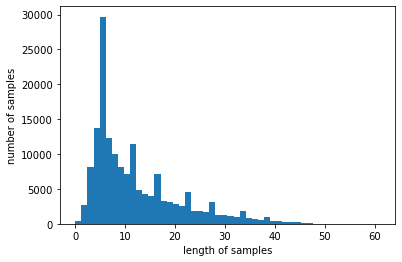

In [170]:
print('Î¨∏Ïû•Ïùò ÏµúÎåÄ Í∏∏Ïù¥ :',max(len(l) for l in t_train1))
print('Î¨∏Ïû•Ïùò ÌèâÍ∑† Í∏∏Ïù¥ :',sum(map(len, t_train1))/len(t_train1))
plt.hist([len(s) for s in t_train1], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [171]:
def below_threshold_len(max_len, nested_list):
  cnt = 0
  for s in nested_list:
    if(len(s) <= max_len):
        cnt = cnt + 1
  print('Ï†ÑÏ≤¥ ÏÉòÌîå Ï§ë Í∏∏Ïù¥Í∞Ä %s Ïù¥ÌïòÏù∏ ÏÉòÌîåÏùò ÎπÑÏú®: %s'%(max_len, (cnt / len(nested_list))*100))

In [172]:
max_len = 40
below_threshold_len(max_len, t_train1)

Ï†ÑÏ≤¥ ÏÉòÌîå Ï§ë Í∏∏Ïù¥Í∞Ä 40 Ïù¥ÌïòÏù∏ ÏÉòÌîåÏùò ÎπÑÏú®: 99.1014792567576


In [173]:
t_train2 = pad_sequences(t_train1, maxlen = max_len)
# t_train11, t_train22 = tokenizer.texts_to_sequences
t_test2 = pad_sequences(t_test1, maxlen = max_len)

In [174]:
from keras import models
from tensorflow.keras.layers import Embedding, Dense, LSTM, GRU, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [175]:
model = Sequential()
model.add(Embedding(vocab_size, 100))
model.add(GRU(128))
model.add(Dense(1, activation='sigmoid'))

model.summary()

es = EarlyStopping(monitor='val_loss', mode='min'
                   
                   , verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.compile(optimizer='adam', loss='mse', metrics=['acc'])
history = model.fit(t_train2, e_train, epochs=15, callbacks=[es, mc], batch_size=60, validation_split=0.2)

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_15 (Embedding)     (None, None, 100)         4687000   
_________________________________________________________________
gru_20 (GRU)                 (None, 128)               88320     
_________________________________________________________________
dense_32 (Dense)             (None, 1)                 129       
Total params: 4,775,449
Trainable params: 4,775,449
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15
2140/2140 [==============================] - 194s 89ms/step - loss: 0.0867 - acc: 0.8853 - val_loss: 0.0765 - val_acc: 0.8992

Epoch 00001: val_acc improved from -inf to 0.89925, saving model to best_model.h5
Epoch 2/15
2140/2140 [==============================] - 188s 88ms/step - loss: 0.0611 - acc: 0.9227 - val_loss: 0.0748 - val_acc: 0.9027

Epoch 00002: va

In [176]:
loaded_model = load_model('best_model.h5')
print("\n ÌÖåÏä§Ìä∏ Ï†ïÌôïÎèÑ: %.4f" % (loaded_model.evaluate(t_test2, e_test)[1]))

1672/1672 [==============================] - 20s 12ms/step - loss: 0.0752 - acc: 0.9021

 ÌÖåÏä§Ìä∏ Ï†ïÌôïÎèÑ: 0.9021


In [102]:
loaded_model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, None, 100)         4687000   
_________________________________________________________________
gru_5 (GRU)                  (None, None, 128)         88320     
_________________________________________________________________
gru_6 (GRU)                  (None, 32)                15552     
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 33        
Total params: 4,790,905
Trainable params: 4,790,905
Non-trainable params: 0
_________________________________________________________________


In [103]:
def sentiment_predict(new_sentence):
    new_sentence = okt.morphs(new_sentence, stem=True) # ÌÜ†ÌÅ∞Ìôî
    new_sentence = [word for word in new_sentence if not word in stopwords] # Î∂àÏö©Ïñ¥ Ï†úÍ±∞
    encoded = tokenizer.texts_to_sequences([new_sentence]) # Ï†ïÏàò Ïù∏ÏΩîÎî©
    pad_new = pad_sequences(encoded, maxlen = max_len) # Ìå®Îî©
    score = float(loaded_model.predict(pad_new)) # ÏòàÏ∏°
    if(score > 0.8):
        print("{:.4f}ÌñâÎ≥µÌï©ÎãàÎã§.\n".format(score))
    elif(score > 0.6) :
        print("{:.4f}ÏïΩÍ∞Ñ Í∏∞Î∂ÑÏù¥ Ï¢ãÏäµÎãàÎã§.\n".format(score))
    elif(score > 0.4) :
        print("{:.4f}ÏïΩÍ∞Ñ Í∏∞Î∂ÑÏù¥ ÏïàÏ¢ãÏäµÎãàÎã§.\n".format(score))
    elif(score > 0.2) :
        print("{:.4f}Í∏∞Î∂ÑÏù¥ ÎÇòÏÅ©ÎãàÎã§.\n".format(score))
    else:
        print("{:.4f}Í∏∞Î∂ÑÏù¥ Îß§Ïö∞ ÎÇòÏÅ©ÎãàÎã§.\n".format(score))

In [141]:
sentiment_predict('Î≠êÍ∞Ä Î¨∏Ï†úÏïº')

0.1783Í∏∞Î∂ÑÏù¥ Îß§Ïö∞ ÎÇòÏÅ©ÎãàÎã§.



In [142]:
print('0Ïóê Í∞ÄÍπåÏö∞Î©¥ Î∂ÄÏ†ï, 1Ïóê Í∞ÄÍπåÏö∞Î©¥ Í∏çÏ†ï\n')
sentiment_predict('ÏïÑ ÏßÑÏßú ÏßúÏ¶ùÎÇúÎã§ Ïù¥Í≤å Î≠êÎÉê ÎêòÎäî ÏùºÎèÑ ÏóÜÍ≥†')

0Ïóê Í∞ÄÍπåÏö∞Î©¥ Î∂ÄÏ†ï, 1Ïóê Í∞ÄÍπåÏö∞Î©¥ Í∏çÏ†ï

0.0099Í∏∞Î∂ÑÏù¥ Îß§Ïö∞ ÎÇòÏÅ©ÎãàÎã§.



In [143]:
print('0Ïóê Í∞ÄÍπåÏö∞Î©¥ Î∂ÄÏ†ï, 1Ïóê Í∞ÄÍπåÏö∞Î©¥ Í∏çÏ†ï\n')
sentiment_predict('Ïò§Îäò ÏïºÍ∑ºÏù¥ÎùºÏÑú')

0Ïóê Í∞ÄÍπåÏö∞Î©¥ Î∂ÄÏ†ï, 1Ïóê Í∞ÄÍπåÏö∞Î©¥ Í∏çÏ†ï

0.2049Í∏∞Î∂ÑÏù¥ ÎÇòÏÅ©ÎãàÎã§.



In [144]:
print('0Ïóê Í∞ÄÍπåÏö∞Î©¥ Î∂ÄÏ†ï, 1Ïóê Í∞ÄÍπåÏö∞Î©¥ Í∏çÏ†ï\n')
sentiment_predict('Ïò§Îäò Îç∞Ïù¥Ìä∏ Ïñ¥ÎîîÏÑú Ìï†Íπå??')

0Ïóê Í∞ÄÍπåÏö∞Î©¥ Î∂ÄÏ†ï, 1Ïóê Í∞ÄÍπåÏö∞Î©¥ Í∏çÏ†ï

0.6182ÏïΩÍ∞Ñ Í∏∞Î∂ÑÏù¥ Ï¢ãÏäµÎãàÎã§.



In [145]:
print('0Ïóê Í∞ÄÍπåÏö∞Î©¥ Î∂ÄÏ†ï, 1Ïóê Í∞ÄÍπåÏö∞Î©¥ Í∏çÏ†ï\n')
sentiment_predict('Ï†ÄÌù¨ Ï°∞ ÎßùÌñàÏñ¥Ïöî')

0Ïóê Í∞ÄÍπåÏö∞Î©¥ Î∂ÄÏ†ï, 1Ïóê Í∞ÄÍπåÏö∞Î©¥ Í∏çÏ†ï

0.0467Í∏∞Î∂ÑÏù¥ Îß§Ïö∞ ÎÇòÏÅ©ÎãàÎã§.



In [146]:
print('0Ïóê Í∞ÄÍπåÏö∞Î©¥ Î∂ÄÏ†ï, 1Ïóê Í∞ÄÍπåÏö∞Î©¥ Í∏çÏ†ï\n')
sentiment_predict('Ïò§Îäò ÏßëÏóê Í∞ÄÏÑú Î≠êÌïòÏßÄ?')

0Ïóê Í∞ÄÍπåÏö∞Î©¥ Î∂ÄÏ†ï, 1Ïóê Í∞ÄÍπåÏö∞Î©¥ Í∏çÏ†ï

0.8004ÌñâÎ≥µÌï©ÎãàÎã§.



In [147]:
sentiment_predict('Í∑∏ÎûòÏ£ºÎ©¥ Ï¢ãÍ≤†ÎäîÎç∞ Í¥úÏ∞ÆÍ≤†Ïñ¥?')

0.9621ÌñâÎ≥µÌï©ÎãàÎã§.



In [148]:
sentiment_predict('Ïù¥Î≤àÏ£ºÎäî ÏãúÌóòÍ∏∞Í∞Ñ')

0.1799Í∏∞Î∂ÑÏù¥ Îß§Ïö∞ ÎÇòÏÅ©ÎãàÎã§.



In [149]:
sentiment_predict('Ï∂ïÌïòÏ∂ïÌïò')

0.9860ÌñâÎ≥µÌï©ÎãàÎã§.



In [113]:
sentiment_predict('ÎÇ†ÎèÑ Ï¢ãÏùÄÎç∞ ÏãúÏõêÌïòÍ≤å Îß•Ï£º ÌïúÏûî ÏΩú?')

0.9848ÌñâÎ≥µÌï©ÎãàÎã§.



In [114]:
sentiment_predict('Ïù¥ÌòÑÏßÄ ÏµúÍ≥†~~~~')

0.9512ÌñâÎ≥µÌï©ÎãàÎã§.



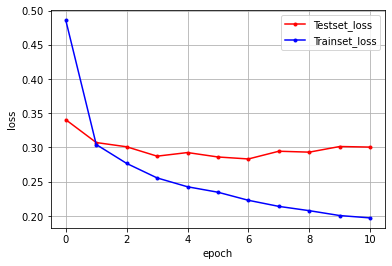

In [115]:
# ÌÖåÏä§Ìä∏ ÏÖãÏùò Ïò§Ï∞®
y_vloss = history.history['val_loss']

# ÌïôÏäµÏÖãÏùò Ïò§Ï∞®
y_loss = history.history['loss']

# Í∑∏ÎûòÌîÑÎ°ú ÌëúÌòÑ
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# Í∑∏ÎûòÌîÑÏóê Í∑∏Î¶¨ÎìúÎ•º Ï£ºÍ≥† Î†àÏù¥Î∏îÏùÑ ÌëúÏãú
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

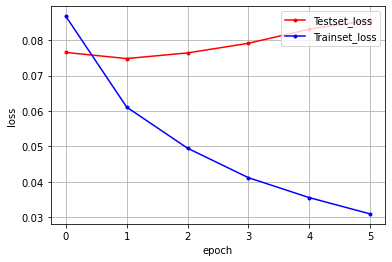

In [177]:
 # ÌÖåÏä§Ìä∏ ÏÖãÏùò Ïò§Ï∞®
y_vloss = history.history['val_loss']

# ÌïôÏäµÏÖãÏùò Ïò§Ï∞®
y_loss = history.history['loss']

# Í∑∏ÎûòÌîÑÎ°ú ÌëúÌòÑ
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# Í∑∏ÎûòÌîÑÏóê Í∑∏Î¶¨ÎìúÎ•º Ï£ºÍ≥† Î†àÏù¥Î∏îÏùÑ ÌëúÏãú
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

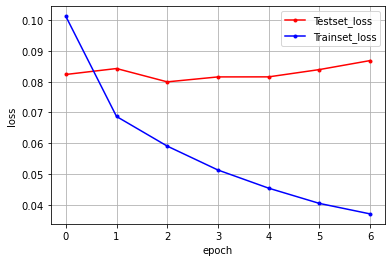

In [132]:
 # ÌÖåÏä§Ìä∏ ÏÖãÏùò Ïò§Ï∞®
y_vloss = history.history['val_loss']

# ÌïôÏäµÏÖãÏùò Ïò§Ï∞®
y_loss = history.history['loss']

# Í∑∏ÎûòÌîÑÎ°ú ÌëúÌòÑ
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# Í∑∏ÎûòÌîÑÏóê Í∑∏Î¶¨ÎìúÎ•º Ï£ºÍ≥† Î†àÏù¥Î∏îÏùÑ ÌëúÏãú
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()